# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


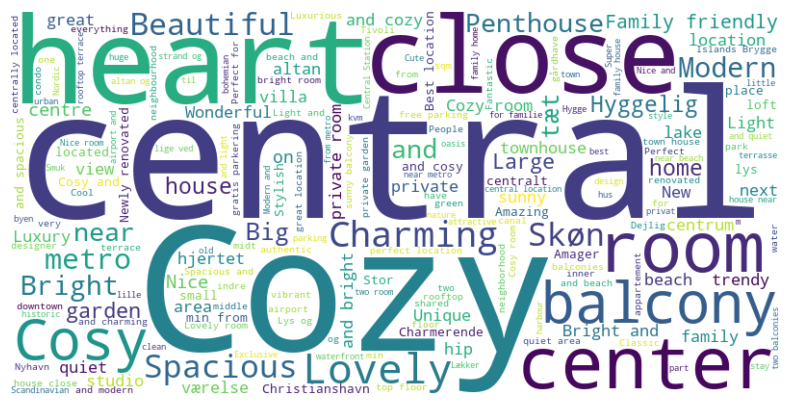

In [27]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

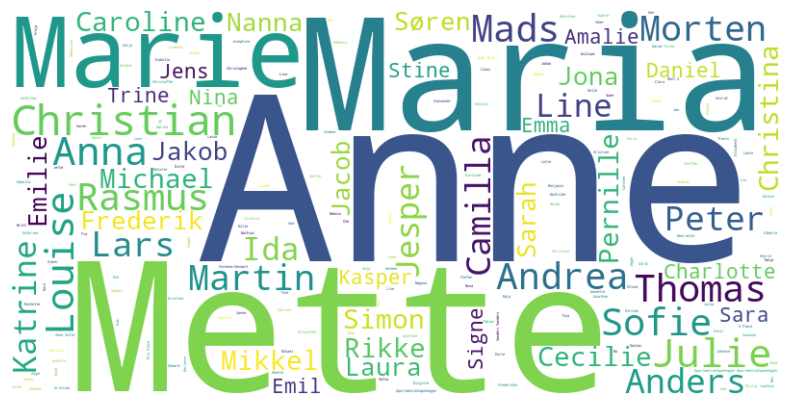

In [30]:
filtered_names = data_filtered[data_filtered.host_name.str.contains(' ')]
stop_names = filtered_names["host_name"].unique()
stop_names = stop_names + 'ApartmentinCopenhagen'

text_names = ' '.join(data_filtered['host_name'].astype(str))

# Create and generate a word cloud image
wordcloud_names = WordCloud(stopwords=stop_names, background_color="white", width=800, height=400).generate(text_names)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_names, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

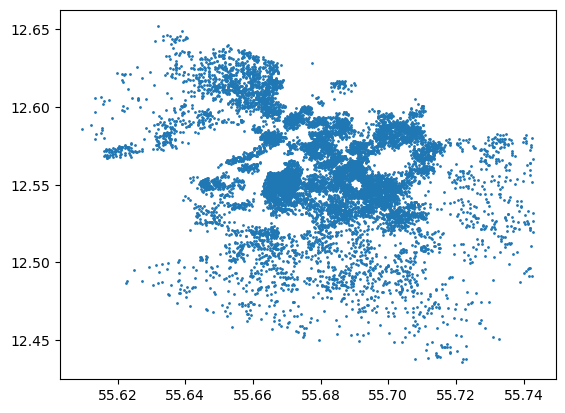

In [32]:
xpoints = data_filtered["latitude"]
ypoints = data_filtered["longitude"]

plt.plot(xpoints, ypoints, 'o', markersize=1)
plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

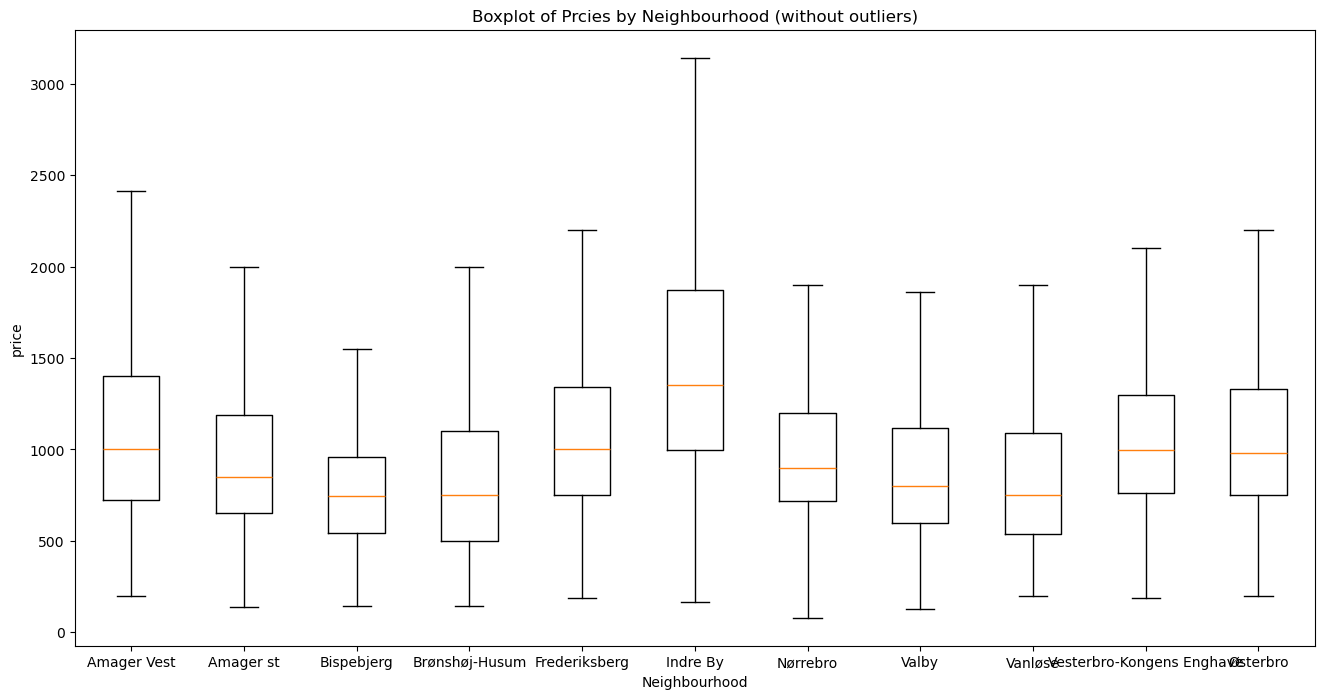

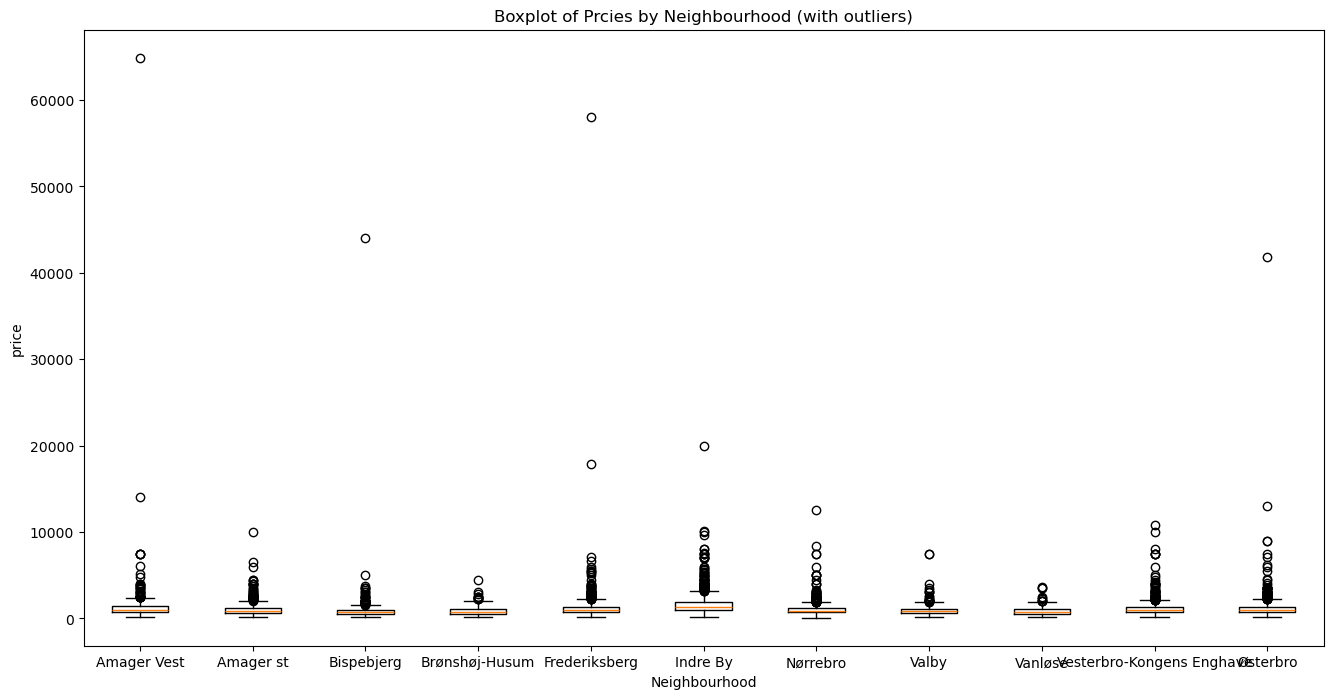

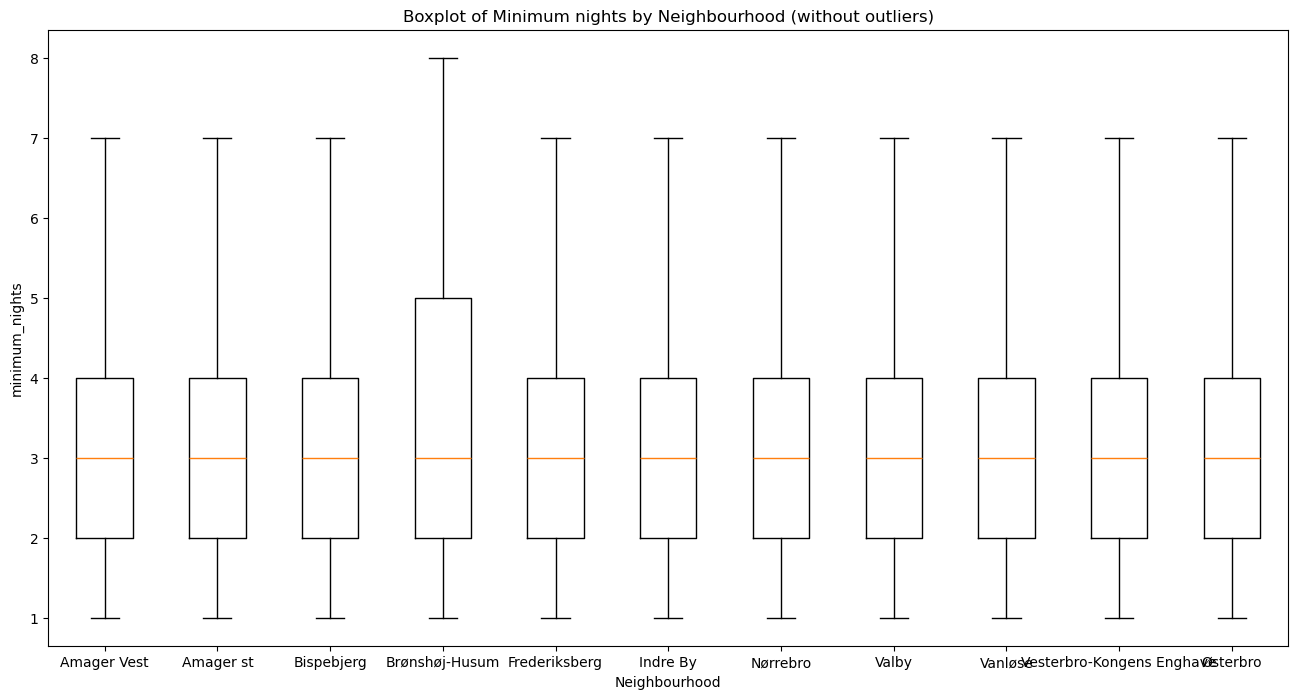

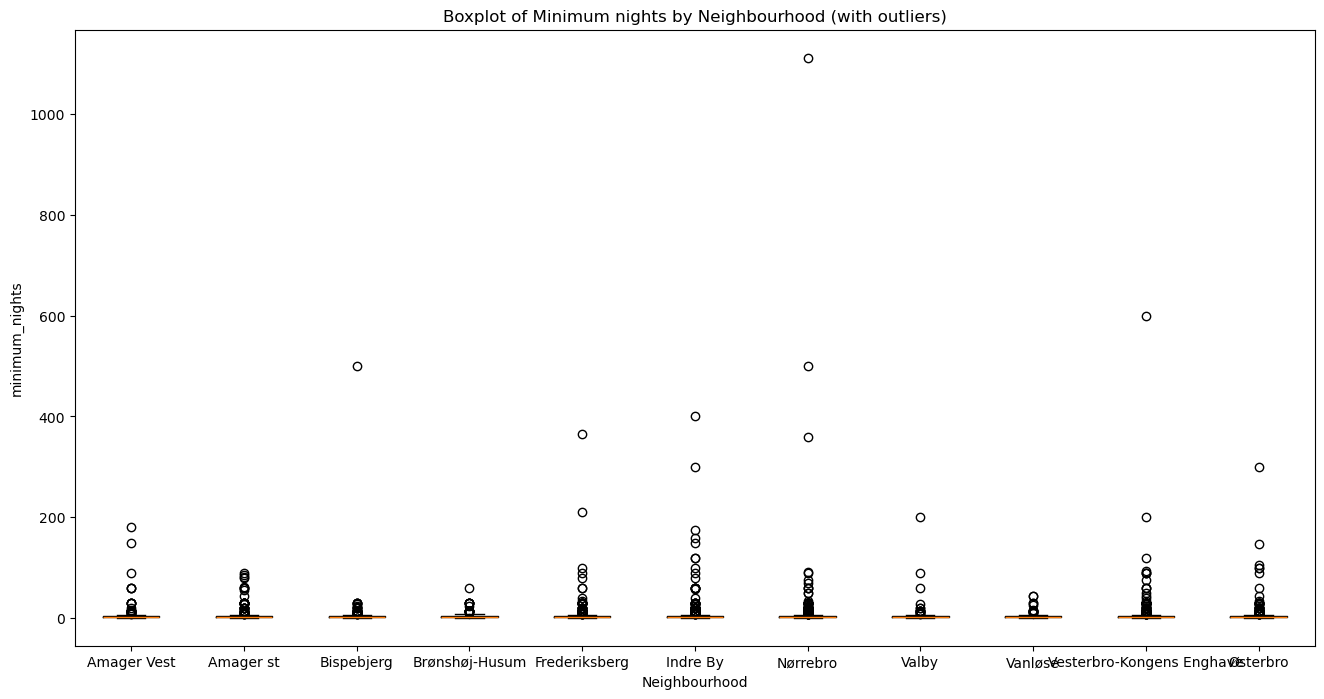

In [34]:
classes = sorted(data_filtered['neighbourhood_cleansed'].unique())

# Create a boxplot
plt.figure(figsize=(16, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood_cleansed]['price'] for neighbourhood_cleansed in classes], labels=classes, showfliers=False)
plt.xlabel('Neighbourhood')
plt.ylabel('price')
plt.title('Boxplot of Prcies by Neighbourhood (without outliers)')
plt.show()

# Create a boxplot
plt.figure(figsize=(16, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood_cleansed]['price'] for neighbourhood_cleansed in classes], labels=classes, showfliers=True)
plt.xlabel('Neighbourhood')
plt.ylabel('price')
plt.title('Boxplot of Prcies by Neighbourhood (with outliers)')
plt.show()

# Create a boxplot
plt.figure(figsize=(16, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood_cleansed]['minimum_nights'] for neighbourhood_cleansed in classes], labels=classes, showfliers=False)
plt.xlabel('Neighbourhood')
plt.ylabel('minimum_nights')
plt.title('Boxplot of Minimum nights by Neighbourhood (without outliers)')
plt.show()

# Create a boxplot
plt.figure(figsize=(16, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood_cleansed]['minimum_nights'] for neighbourhood_cleansed in classes], labels=classes, showfliers=True)
plt.xlabel('Neighbourhood')
plt.ylabel('minimum_nights')
plt.title('Boxplot of Minimum nights by Neighbourhood (with outliers)')
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [36]:
from statistics import mode

analysis = data_filtered.groupby(['room_type', 'neighbourhood_cleansed'])

price_stats = analysis['price'].describe()
price_stats = price_stats.round(2)

price_stats['mode'] = analysis['price'].agg(lambda x: mode(x))
display(price_stats)

count     mean      std     min  \
room_type       neighbourhood_cleansed                                        
Entire home/apt Amager Vest                 909.0  1234.23   832.70   250.0   
                Amager st                   791.0  1093.58   721.98   240.0   
                Bispebjerg                  508.0   992.59  1981.58   235.0   
                Brønshøj-Husum              216.0  1015.00   555.67   250.0   
                Frederiksberg              1044.0  1292.47  1958.80   300.0   
                Indre By                   1702.0  1642.39  1072.62   350.0   
                Nørrebro                   1889.0  1047.74   583.70   216.0   
                Valby                       450.0  1017.97   635.43   303.0   
                Vanløse                     254.0   954.43   496.66   269.0   
                Vesterbro-Kongens Enghave  1811.0  1181.44   698.12   300.0   
                Østerbro                   1174.0  1248.55  1438.91   268.0   
Hotel room      Amager st                     3.0  1296.00   211.18  1149.0   
                Indre By                     10.0  1077.20   654.26   204.0   
Private room    Amager Vest                 148.0  1032.97  5299.02   200.0   
                Amager st                   129.0   549.33   294.00   135.0   
                Bispebjerg                   95.0   488.98   353.67   143.0   
                Brønshøj-Husum               67.0   445.55   201.63   145.0   
                Frederiksberg               133.0   621.71   567.61   185.0   
                Indre By                    128.0   698.98   380.07   165.0   
                Nørrebro                    165.0   650.12   760.27    79.0   
                Valby                        89.0   498.16   288.62   127.0   
                Vanløse                      44.0   413.41   194.58   200.0   
                Vesterbro-Kongens Enghave   221.0   574.37   295.73   186.0   
                Østerbro                    130.0   605.46   437.26   200.0   
Shared room     Amager Vest                   2.0  1051.50   112.43   972.0   
                Amager st                     1.0  2575.00      NaN  2575.0   
                Bispebjerg                    1.0   198.00      NaN   198.0   
                Brønshøj-Husum                2.0   211.50    16.26   200.0   
                Indre By                      4.0   292.00    67.58   223.0   
                Nørrebro                      3.0   324.67   130.48   174.0   
                Vesterbro-Kongens Enghave     2.0   330.50   113.84   250.0   
                Østerbro                      1.0   469.00      NaN   469.0   

                                               25%     50%      75%      max  \
room_type       neighbourhood_cleansed                                         
Entire home/apt Amager Vest                 814.00  1050.0  1480.00  14000.0   
                Amager st                   700.00   900.0  1200.00  10000.0   
                Bispebjerg                  600.00   800.0  1000.00  44000.0   
                Brønshøj-Husum              655.75   900.0  1250.00   4462.0   
                Frederiksberg               822.50  1037.0  1400.00  58000.0   
                Indre By                   1021.25  1400.0  1911.00  20000.0   
                Nørrebro                    750.00   950.0  1200.00  12500.0   
                Valby                       699.00   899.0  1200.00   7429.0   
                Vanløse                     638.75   826.5  1200.00   3643.0   
                Vesterbro-Kongens Enghave   841.00  1000.0  1326.50  10800.0   
                Østerbro                    800.00  1000.0  1400.00  41800.0   
Hotel room      Amager st                  1175.00  1201.0  1369.50   1538.0   
                Indre By                    393.50  1306.0  1553.75   1862.0   
Private room    Amager Vest                 400.00   500.0   655.00  64900.0   
                Amager st                   400.00   471.0   600.00   2000.0 

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [38]:
# data_limited = data[[
#     "minimum_nights"  ,
#     "number_of_reviews",  
#     "review_scores_rating"  ,
#     "review_scores_accuracy" , 
#     "review_scores_cleanliness"  ,
#     "review_scores_checkin"  ,
#     "review_scores_communication"  ,
#     "review_scores_location"  ,
#     "review_scores_value"  ,
#     "reviews_per_month"  ,
#     "availability_365",
#     "Amager Vest",
#     "Amager st",
#     "Bispebjerg",
#     "Brønshøj-Husum",
#     "Frederiksberg",
#     "Indre By",
#     "Nørrebro",
#     "Valby",
#     "Vanløse",
#     "Vesterbro-Kongens Enghave",
#     "Østerbro",
#     "Entire home/apt",
#     "Hotel room",
#     "Private room",
#     "Shared room",]]

neighbourhoods = pd.get_dummies(data_filtered["neighbourhood_cleansed"])
room_types = pd.get_dummies(data_filtered["room_type"])

data_filtered = data_filtered.drop(["id", "name","host_id","host_name", "neighbourhood_cleansed", "latitude", 
                                    "longitude", "room_type", "price", "last_review", "calculated_host_listings_count"], axis='columns')

data_filtered["Amager Vest"] = neighbourhoods["Amager Vest"]
data_filtered["Amager st"] = neighbourhoods["Amager st"]
data_filtered["Bispebjerg"] = neighbourhoods["Bispebjerg"]
data_filtered["Brønshøj-Husum"] = neighbourhoods["Brønshøj-Husum"]
data_filtered["Frederiksberg"] = neighbourhoods["Frederiksberg"]
data_filtered["Indre By"] = neighbourhoods["Indre By"]
data_filtered["Nørrebro"] = neighbourhoods["Nørrebro"]
data_filtered["Valby"] = neighbourhoods["Valby"]
data_filtered["Vanløse"] = neighbourhoods["Vanløse"]
data_filtered["Vesterbro-Kongens Enghave"] = neighbourhoods["Vesterbro-Kongens Enghave"]
data_filtered["Østerbro"] = neighbourhoods["Østerbro"]

data_filtered["Entire home/apt"] = room_types["Entire home/apt"]
data_filtered["Hotel room"] = room_types["Hotel room"]
data_filtered["Private room"] = room_types["Private room"]
data_filtered["Shared room"] = room_types["Shared room"]

labels = data_filtered["price_category"]

data = data_filtered.drop(['price_category'], axis='columns')

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(data, labels)

KNeighborsClassifier()

In [39]:
print("Accuracy score: {}".format(model.score(data, labels)))

Accuracy score: 0.7329704766617187


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rename the data
X = data
y = labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Try to remove random_state

# Define the range of hyperparameters to test
neighbors_range = range(3, 20)  # Number of neighbors from 3 to 19
distance_metrics = ['euclidean', 'manhattan', 'minkowski']  # Common distance metrics, only illustration, doesn't make sense!

# Variables to store the best parameters and highest accuracy
best_accuracy = 0
best_params = {'n_neighbors': None, 'metric': None}

# Nested loop to iterate over the hyperparameters
for n_neighbors in neighbors_range:
    for metric in distance_metrics:
        # Initialize the KNN model with current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

        # Train the model
        knn.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = knn.predict(X_test)

        # Calculate the accuracy
        accuracy = accuracy_score(y_test, predictions)

        # Update the best parameters if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n_neighbors
            best_params['metric'] = metric

# Print the best set of parameters and the highest accuracy achieved
print(f"Best parameters: Number of Neighbors - {best_params['n_neighbors']}, Distance Metric - {best_params['metric']}")
print(f"Highest Accuracy: {best_accuracy*100:.2f}%")

Best parameters: Number of Neighbors - 17, Distance Metric - manhattan
Highest Accuracy: 62.49%
